# Portfolio Analysis

In [1]:
# Import initial libraries
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
#import alpaca_trade_api as tradeapi
import dash
import dash_core_components as dcc
from dash import html
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from MCForecastTools import MCSimulation
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode(connected=True)
import ipywidgets as widgets
import dash_table
import dash_table.FormatTemplate as FormatTemplate
from dash_table.Format import Format, Scheme, Symbol, Group
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:
#Read the Holdings file

portfolio_df = pd.read_excel('Holdings.xlsx', sheet_name='Portfolio', parse_dates=True)
portfolio_df.head(10)

,Acquisition Date,Ticker,Quantity,Unit Cost,Cost Basis,Start of Year
0,2019-02-07,AAPL,300,43.50,13050.00,2020-12-31
1,2019-02-07,JNJ,100,132.50,13250.00,2020-12-31
2,2019-02-07,MCD,100,175.20,17520.00,2020-12-31
3,2019-02-07,MTCH,200,55.80,11160.00,2020-12-31
4,2019-02-07,NFLX,75,345.40,25905.00,2020-12-31
5,2019-02-07,WMT,125,149.35,18668.75,2020-12-31
6,2019-02-07,FB,150,165.50,24825.00,2020-12-31
7,2019-02-07,TWTR,225,30.31,6819.75,2020-12-31
8,2019-02-07,TTD,100,14.30,1430.00,2020-12-31


In [3]:
#Required for Alpaca
# Load .env environment variables
#from dotenv import load_dotenv
#load_dotenv("api.env")

In [4]:
# Set Alpaca API key and secret
#alpaca_api_key = os.getenv("ALPACA_API_KEY")
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
#alpaca = tradeapi.REST(
#    alpaca_api_key,
#    alpaca_secret_key,
#    api_version="v2"
#)

In [5]:
#Setup Alpaca to get Data
# Set the tickers and add SPY
portfolio_tickers =portfolio_df['Ticker'].to_list()
tickers = portfolio_df['Ticker'].to_list()
spy_ticker='^GSPC'
tickers.append(spy_ticker)

# Set timeframe to '1D'
#timeframe = "1D"

# Set start and end datetimes 
#start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
#end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()

start_date = "2019-01-01"
end_date = "2021-12-31"
#For YTD Calcs
#end_last_year = datetime.date.fromisoformat(portfolio_df['Start of Year'][0].strftime('%Y-%m-%d'))
#end_last_year = datetime.date.fromisoformat(portfolio_df['Start of Year'][0].strftime('%Y-%m-%d'))
end_last_year=datetime.date.fromisoformat(portfolio_df['Start of Year'][0].strftime('%Y-%m-%d'))

# Set limit_rows to 1000 to retreive the maximum amount of rows
#limit_rows = 1000

# Get 1 year's worth of historical data for Tesla and Coca-Cola
# YOUR CODE HERE!
#df_ticker = alpaca.get_barset(
#    tickers,
#    timeframe,
#    start=start_date,
#    end=end_date,
#    limit=limit_rows
#).df

#Alpaca does not have Adj Closes. Switching to Yahoo! Finance
yf.pdr_override()

df_ticker = pdr.get_data_yahoo(tickers, start=start_date , end=end_date)
# Display data
df_ticker

[*********************100%***********************]  10 of 10 completed


Adj Close                                                  \
                  AAPL          FB         JNJ         MCD        MTCH   
Date                                                                     
2019-01-02   38.326294  135.679993  118.758545  164.881195   42.380001   
2019-01-03   34.508713  131.740005  116.871429  163.794846   41.119999   
2019-01-04   35.981861  137.949997  118.832916  166.960266   43.049999   
2019-01-07   35.901772  138.050003  118.070641  168.777069   43.369999   
2019-01-08   36.586174  142.529999  120.813011  169.132980   44.779999   
...                ...         ...         ...         ...         ...   
2021-11-03  151.269241  331.619995  165.059998  250.399994  152.940002   
2021-11-04  150.740005  335.850006  164.600006  253.460007  156.979996   
2021-11-05  151.279999  341.130005  163.429993  254.710007  160.729996   
2021-11-08  150.440002  338.619995  162.869995  253.100006  155.910004   
2021-11-09  150.809998  335.369995  162.509995  252.649994  155.589996   

                                                                       ...  \
                  NFLX        TTD       TWTR         WMT        ^GSPC  ...   
Date                                                                   ...   
2019-01-02  267.660004  11.616000  28.809999   88.933060  2510.030029  ...   
2019-01-03  271.200012  10.956000  27.990000   88.475708  2447.889893  ...   
2019-01-04  297.570007  11.792000  29.950001   89.028328  2531.939941  ...   
2019-01-07  315.339996  12.457000  31.340000   90.076401  2549.689941  ...   
2019-01-08  320.269989  12.805000  31.799999   90.705231  2574.409912  ...   
...                ...        ...        ...         ...          ...  ...   
2021-11-03  688.289978  76.709999  54.529999  150.179993  4660.569824  ...   
2021-11-04  668.400024  72.430000  53.680000  151.279999  4680.060059  ...   
2021-11-05  645.719971  68.550003  53.150002  150.229996  4697.529785  ...   
2021-11-08  651.450012  88.750000  54.080002  149.270004  4701.700195  ...   
2021-11-09  655.989990  97.089996  53.700001  149.789993  4685.250000  ...   

               Volume                                                 \
                 AAPL        FB      JNJ      MCD     MTCH      NFLX   
Date                                                                   
2019-01-02  148158800  28146200  7631700  2571500  1677800  11679500   
2019-01-03  365248800  22717900  8654500  3728200  1828000  14969600   
2019-01-04  234428400  29002100  8831700  3194300  2460100  19330100   
2019-01-07  219111200  20089300  8404700  3283000  1471900  18620100   
2019-01-08  164101200  26263800  9351600  2941400  2470500  15359200   
...               ...       ...      ...      ...      ...       ...   
2021-11-03   54511500  20786500  6717800  2399000  3933800   2334900   
2021-11-04   60394600  22495300  8224400  2711000  2433500   4865000   
2021-11-05   65414600  26852100  6214600  3223400  2521500   5277400   
2021-11-08   55020900  18342500  5578800  2471300  2920600   2887500   
2021-11-09   56722500  17535900  6112200  2258900  2133900   2414800   

                                                     
                 TTD      TWTR      WMT       ^GSPC  
Date                                                 
2019-01-02   8393000  15053700  8152700  3733160000  
2019-01-03   7754000  19051700  8277300  3822860000  
2019-01-04  11460000  23412600  8029100  4213410000  
2019-01-07  10790000  19917800  7789700  4104710000  
2019-01-08   9501000  18915200  7200900  4083030000  
...              ...       ...      ...         ...  
2021-11-03   2718800   9774200  4736500  3339440000  
2021-11-04   5337800  11284700  5049700  3332940000  
2021-11-05   8531900  13263900  5026500  3491150000  
2021-11-08  31558100  10565500  5124400  3465720000  
2021-11-09  17184300  11223700  4999400  3110230000  

[721 rows x 60 columns]

In [6]:
df_ticker.dtypes

Adj Close  AAPL     float64
           FB       float64
           JNJ      float64
           MCD      float64
           MTCH     float64
           NFLX     float64
           TTD      float64
           TWTR     float64
           WMT      float64
           ^GSPC    float64
Close      AAPL     float64
           FB       float64
           JNJ      float64
           MCD      float64
           MTCH     float64
           NFLX     float64
           TTD      float64
           TWTR     float64
           WMT      float64
           ^GSPC    float64
High       AAPL     float64
           FB       float64
           JNJ      float64
           MCD      float64
           MTCH     float64
           NFLX     float64
           TTD      float64
           TWTR     float64
           WMT      float64
           ^GSPC    float64
Low        AAPL     float64
           FB       float64
           JNJ      float64
           MCD      float64
           MTCH     float64
           NFLX     

In [7]:
df_ticker.tail()

Adj Close                                                  \
                  AAPL          FB         JNJ         MCD        MTCH   
Date                                                                     
2021-11-03  151.269241  331.619995  165.059998  250.399994  152.940002   
2021-11-04  150.740005  335.850006  164.600006  253.460007  156.979996   
2021-11-05  151.279999  341.130005  163.429993  254.710007  160.729996   
2021-11-08  150.440002  338.619995  162.869995  253.100006  155.910004   
2021-11-09  150.809998  335.369995  162.509995  252.649994  155.589996   

                                                                       ...  \
                  NFLX        TTD       TWTR         WMT        ^GSPC  ...   
Date                                                                   ...   
2021-11-03  688.289978  76.709999  54.529999  150.179993  4660.569824  ...   
2021-11-04  668.400024  72.430000  53.680000  151.279999  4680.060059  ...   
2021-11-05  645.719971  68.550003  53.150002  150.229996  4697.529785  ...   
2021-11-08  651.450012  88.750000  54.080002  149.270004  4701.700195  ...   
2021-11-09  655.989990  97.089996  53.700001  149.789993  4685.250000  ...   

              Volume                                                          \
                AAPL        FB      JNJ      MCD     MTCH     NFLX       TTD   
Date                                                                           
2021-11-03  54511500  20786500  6717800  2399000  3933800  2334900   2718800   
2021-11-04  60394600  22495300  8224400  2711000  2433500  4865000   5337800   
2021-11-05  65414600  26852100  6214600  3223400  2521500  5277400   8531900   
2021-11-08  55020900  18342500  5578800  2471300  2920600  2887500  31558100   
2021-11-09  56722500  17535900  6112200  2258900  2133900  2414800  17184300   

                                           
                TWTR      WMT       ^GSPC  
Date                                       
2021-11-03   9774200  4736500  3339440000  
2021-11-04  11284700  5049700  3332940000  
2021-11-05  13263900  5026500  3491150000  
2021-11-08  10565500  5124400  3465720000  
2021-11-09  11223700  4999400  3110230000  

[5 rows x 60 columns]

In [8]:
# Create and empty DataFrame for closing prices

df_closing_prices = pd.DataFrame()
for ticker in tickers:
    df_closing_prices[ticker]=df_ticker['Adj Close'][ticker]
    
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
df_closing_prices.index.name='Date'
df_closing_prices.tail()    

,AAPL,JNJ,MCD,MTCH,NFLX,WMT,FB,TWTR,TTD,^GSPC
Date,,,,,,,,,,
2021-11-03,151.269241,165.059998,250.399994,152.940002,688.289978,150.179993,331.619995,54.529999,76.709999,4660.569824
2021-11-04,150.740005,164.600006,253.460007,156.979996,668.400024,151.279999,335.850006,53.680000,72.430000,4680.060059
2021-11-05,151.279999,163.429993,254.710007,160.729996,645.719971,150.229996,341.130005,53.150002,68.550003,4697.529785
2021-11-08,150.440002,162.869995,253.100006,155.910004,651.450012,149.270004,338.619995,54.080002,88.750000,4701.700195
2021-11-09,150.809998,162.509995,252.649994,155.589996,655.989990,149.789993,335.369995,53.700001,97.089996,4685.250000


In [9]:
df_closing_prices

,AAPL,JNJ,MCD,MTCH,NFLX,WMT,FB,TWTR,TTD,^GSPC
Date,,,,,,,,,,
2019-01-02,38.326294,118.758545,164.881195,42.380001,267.660004,88.933060,135.679993,28.809999,11.616000,2510.030029
2019-01-03,34.508713,116.871429,163.794846,41.119999,271.200012,88.475708,131.740005,27.990000,10.956000,2447.889893
2019-01-04,35.981861,118.832916,166.960266,43.049999,297.570007,89.028328,137.949997,29.950001,11.792000,2531.939941
2019-01-07,35.901772,118.070641,168.777069,43.369999,315.339996,90.076401,138.050003,31.340000,12.457000,2549.689941
2019-01-08,36.586174,120.813011,169.132980,44.779999,320.269989,90.705231,142.529999,31.799999,12.805000,2574.409912
...,...,...,...,...,...,...,...,...,...,...
2021-11-03,151.269241,165.059998,250.399994,152.940002,688.289978,150.179993,331.619995,54.529999,76.709999,4660.569824
2021-11-04,150.740005,164.600006,253.460007,156.979996,668.400024,151.279999,335.850006,53.680000,72.430000,4680.060059
2021-11-05,151.279999,163.429993,254.710007,160.729996,645.719971,150.229996,341.130005,53.150002,68.550003,4697.529785


In [10]:
# Grab the latest stock close price

df_close_latest = df_closing_prices.iloc[-1].to_frame('Last Close')
df_close_latest.index.name='Ticker'
df_close_latest

,Last Close
Ticker,
AAPL,150.809998
JNJ,162.509995
MCD,252.649994
MTCH,155.589996
NFLX,655.989990
WMT,149.789993
FB,335.369995
TWTR,53.700001
TTD,97.089996


In [11]:
#get the End of Last year Closing price
df_close_YTD_start = df_closing_prices.loc[end_last_year].to_frame('YTD Close')
df_close_YTD_start.index.name="Ticker"
df_close_YTD_start

,YTD Close
Ticker,
AAPL,131.876999
JNJ,154.516754
MCD,210.939957
MTCH,151.190002
NFLX,540.729980
WMT,142.464844
FB,273.160004
TWTR,54.150002
TTD,80.099998


In [12]:
portfolio_df.set_index(['Ticker'], inplace=True)

portfolio_df.head()

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year
Ticker,,,,,
AAPL,2019-02-07,300,43.5,13050.0,2020-12-31
JNJ,2019-02-07,100,132.5,13250.0,2020-12-31
MCD,2019-02-07,100,175.2,17520.0,2020-12-31
MTCH,2019-02-07,200,55.8,11160.0,2020-12-31
NFLX,2019-02-07,75,345.4,25905.0,2020-12-31


In [13]:
# Merge the portfolio dataframe with the  close dataframe; they are being joined by their indexes.

merged_portfolio = pd.merge(portfolio_df, df_close_latest, left_index=True, right_index=True)
merged_portfolio.index.name="Ticker"
merged_portfolio.head(10)

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close
Ticker,,,,,,
AAPL,2019-02-07,300,43.50,13050.00,2020-12-31,150.809998
JNJ,2019-02-07,100,132.50,13250.00,2020-12-31,162.509995
MCD,2019-02-07,100,175.20,17520.00,2020-12-31,252.649994
MTCH,2019-02-07,200,55.80,11160.00,2020-12-31,155.589996
NFLX,2019-02-07,75,345.40,25905.00,2020-12-31,655.989990
WMT,2019-02-07,125,149.35,18668.75,2020-12-31,149.789993
FB,2019-02-07,150,165.50,24825.00,2020-12-31,335.369995
TWTR,2019-02-07,225,30.31,6819.75,2020-12-31,53.700001
TTD,2019-02-07,100,14.30,1430.00,2020-12-31,97.089996


In [14]:
# The below creates a new column which is the ticker return; takes the latest adjusted close for each position
# and divides that by the initial share cost.

merged_portfolio['Ticker Return'] = merged_portfolio['Last Close'] / merged_portfolio['Unit Cost'] - 1
merged_portfolio


,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return
Ticker,,,,,,,
AAPL,2019-02-07,300,43.50,13050.00,2020-12-31,150.809998,2.466896
JNJ,2019-02-07,100,132.50,13250.00,2020-12-31,162.509995,0.226491
MCD,2019-02-07,100,175.20,17520.00,2020-12-31,252.649994,0.442066
MTCH,2019-02-07,200,55.80,11160.00,2020-12-31,155.589996,1.788351
NFLX,2019-02-07,75,345.40,25905.00,2020-12-31,655.989990,0.899218
WMT,2019-02-07,125,149.35,18668.75,2020-12-31,149.789993,0.002946
FB,2019-02-07,150,165.50,24825.00,2020-12-31,335.369995,1.026405
TWTR,2019-02-07,225,30.31,6819.75,2020-12-31,53.700001,0.771693
TTD,2019-02-07,100,14.30,1430.00,2020-12-31,97.089996,5.789510


In [15]:
df_spy_closing_prices=df_closing_prices['^GSPC'].to_frame('SPY Closes')
df_spy_closing_prices.index = df_spy_closing_prices.index.astype('datetime64[ns]')
df_spy_closing_prices.index.name='Date'
df_spy_closing_prices

,SPY Closes
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912
...,...
2021-11-03,4660.569824
2021-11-04,4680.060059
2021-11-05,4697.529785


In [16]:
# Here we are merging the new dataframe with the sp500 adjusted closes since the sp start price based on 
# each ticker's acquisition date and sp500 close date.

merged_portfolio_sp = pd.merge(merged_portfolio, df_spy_closing_prices, left_on='Acquisition Date', right_index=True)
merged_portfolio_sp.head()

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return,SPY Closes
Ticker,,,,,,,,
AAPL,2019-02-07,300,43.5,13050.0,2020-12-31,150.809998,2.466896,2706.050049
JNJ,2019-02-07,100,132.5,13250.0,2020-12-31,162.509995,0.226491,2706.050049
MCD,2019-02-07,100,175.2,17520.0,2020-12-31,252.649994,0.442066,2706.050049
MTCH,2019-02-07,200,55.8,11160.0,2020-12-31,155.589996,1.788351,2706.050049
NFLX,2019-02-07,75,345.4,25905.0,2020-12-31,655.989990,0.899218,2706.050049


In [17]:
# This new column determines what SP 500 equivalent purchase would have been at purchase date of stock.
merged_portfolio_sp['Equiv SPY Shares'] = merged_portfolio_sp['Cost Basis'] / merged_portfolio_sp['SPY Closes']
merged_portfolio_sp.head()

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return,SPY Closes,Equiv SPY Shares
Ticker,,,,,,,,,
AAPL,2019-02-07,300,43.5,13050.0,2020-12-31,150.809998,2.466896,2706.050049,4.822527
JNJ,2019-02-07,100,132.5,13250.0,2020-12-31,162.509995,0.226491,2706.050049,4.896436
MCD,2019-02-07,100,175.2,17520.0,2020-12-31,252.649994,0.442066,2706.050049,6.474381
MTCH,2019-02-07,200,55.8,11160.0,2020-12-31,155.589996,1.788351,2706.050049,4.124092
NFLX,2019-02-07,75,345.4,25905.0,2020-12-31,655.989990,0.899218,2706.050049,9.572994


In [18]:
df_close_latest.loc['^GSPC']

Last Close    4685.25
Name: ^GSPC, dtype: float64

In [19]:
df_closing_prices.iloc[-1]['^GSPC']

4685.25

In [20]:
# We are joining the developing dataframe with the sp500 closes again, this time with the latest close for SP.
merged_portfolio_sp['SPY Latest Close'] =  df_closing_prices.iloc[-1]['^GSPC']

merged_portfolio_sp.head()

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return,SPY Closes,Equiv SPY Shares,SPY Latest Close
Ticker,,,,,,,,,,
AAPL,2019-02-07,300,43.5,13050.0,2020-12-31,150.809998,2.466896,2706.050049,4.822527,4685.25
JNJ,2019-02-07,100,132.5,13250.0,2020-12-31,162.509995,0.226491,2706.050049,4.896436,4685.25
MCD,2019-02-07,100,175.2,17520.0,2020-12-31,252.649994,0.442066,2706.050049,6.474381,4685.25
MTCH,2019-02-07,200,55.8,11160.0,2020-12-31,155.589996,1.788351,2706.050049,4.124092,4685.25
NFLX,2019-02-07,75,345.4,25905.0,2020-12-31,655.989990,0.899218,2706.050049,9.572994,4685.25


In [21]:
# Percent return of SP from acquisition date of position through latest trading day.
merged_portfolio_sp['SP Return'] = merged_portfolio_sp['SPY Latest Close'] / merged_portfolio_sp['SPY Closes'] - 1

# This is a new column which takes the tickers return and subtracts the sp 500 equivalent range return.
merged_portfolio_sp['Abs. Return Compare'] = merged_portfolio_sp['Ticker Return'] - merged_portfolio_sp['SP Return']

# This is a new column where we calculate the ticker's share value by multiplying the original quantity by the latest close.
merged_portfolio_sp['Ticker Share Value'] = merged_portfolio_sp['Quantity'] * merged_portfolio_sp['Last Close']

# We calculate the equivalent SP 500 Value if we take the original SP shares * the latest SP 500 share price.
merged_portfolio_sp['SPY Value'] = merged_portfolio_sp['Equiv SPY Shares'] * merged_portfolio_sp['SPY Latest Close']

# This is a new column where we take the current market value for the shares and subtract the SP 500 value.
merged_portfolio_sp['Abs Value Compare'] = merged_portfolio_sp['Ticker Share Value'] - merged_portfolio_sp['SPY Value']

# This column calculates profit / loss for stock position.
merged_portfolio_sp['Stock Gain / (Loss)'] = merged_portfolio_sp['Ticker Share Value'] - merged_portfolio_sp['Cost Basis']

# This column calculates profit / loss for SP 500.
merged_portfolio_sp['SPY Gain / (Loss)'] = merged_portfolio_sp['SPY Value'] - merged_portfolio_sp['Cost Basis']

merged_portfolio_sp.head()

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return,SPY Closes,Equiv SPY Shares,SPY Latest Close,SP Return,Abs. Return Compare,Ticker Share Value,SPY Value,Abs Value Compare,Stock Gain / (Loss),SPY Gain / (Loss)
Ticker,,,,,,,,,,,,,,,,,
AAPL,2019-02-07,300,43.5,13050.0,2020-12-31,150.809998,2.466896,2706.050049,4.822527,4685.25,0.731398,1.735498,45242.999268,22594.745624,22648.253643,32192.999268,9544.745624
JNJ,2019-02-07,100,132.5,13250.0,2020-12-31,162.509995,0.226491,2706.050049,4.896436,4685.25,0.731398,-0.504908,16250.999451,22941.025251,-6690.025800,3000.999451,9691.025251
MCD,2019-02-07,100,175.2,17520.0,2020-12-31,252.649994,0.442066,2706.050049,6.474381,4685.25,0.731398,-0.289332,25264.999390,30334.095275,-5069.095885,7744.999390,12814.095275
MTCH,2019-02-07,200,55.8,11160.0,2020-12-31,155.589996,1.788351,2706.050049,4.124092,4685.25,0.731398,1.056953,31117.999268,19322.403155,11795.596113,19957.999268,8162.403155
NFLX,2019-02-07,75,345.4,25905.0,2020-12-31,655.989990,0.899218,2706.050049,9.572994,4685.25,0.731398,0.167820,49199.249268,44851.868613,4347.380655,23294.249268,18946.868613


In [22]:
# Merge the overall dataframe with the adj close start of year dataframe for YTD tracking of tickers.
# Should not need to do the outer join;

merged_portfolio_sp_YTD = pd.merge(merged_portfolio_sp, df_close_YTD_start, left_index=True, right_index=True)
# , how='outer'
#merged_portfolio_sp_YTD.rename(columns={'2020-12-31 00:00:00-05:00':'SPY YTD Start Close'}, inplace=True)
merged_portfolio_sp_YTD.head()

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return,SPY Closes,Equiv SPY Shares,SPY Latest Close,SP Return,Abs. Return Compare,Ticker Share Value,SPY Value,Abs Value Compare,Stock Gain / (Loss),SPY Gain / (Loss),YTD Close
Ticker,,,,,,,,,,,,,,,,,,
AAPL,2019-02-07,300,43.5,13050.0,2020-12-31,150.809998,2.466896,2706.050049,4.822527,4685.25,0.731398,1.735498,45242.999268,22594.745624,22648.253643,32192.999268,9544.745624,131.876999
JNJ,2019-02-07,100,132.5,13250.0,2020-12-31,162.509995,0.226491,2706.050049,4.896436,4685.25,0.731398,-0.504908,16250.999451,22941.025251,-6690.025800,3000.999451,9691.025251,154.516754
MCD,2019-02-07,100,175.2,17520.0,2020-12-31,252.649994,0.442066,2706.050049,6.474381,4685.25,0.731398,-0.289332,25264.999390,30334.095275,-5069.095885,7744.999390,12814.095275,210.939957
MTCH,2019-02-07,200,55.8,11160.0,2020-12-31,155.589996,1.788351,2706.050049,4.124092,4685.25,0.731398,1.056953,31117.999268,19322.403155,11795.596113,19957.999268,8162.403155,151.190002
NFLX,2019-02-07,75,345.4,25905.0,2020-12-31,655.989990,0.899218,2706.050049,9.572994,4685.25,0.731398,0.167820,49199.249268,44851.868613,4347.380655,23294.249268,18946.868613,540.729980


In [23]:
merged_portfolio_sp_YTD.dtypes

Acquisition Date       datetime64[ns]
Quantity                        int64
Unit Cost                     float64
Cost Basis                    float64
Start of Year          datetime64[ns]
Last Close                    float64
Ticker Return                 float64
SPY Closes                    float64
Equiv SPY Shares              float64
SPY Latest Close              float64
SP Return                     float64
Abs. Return Compare           float64
Ticker Share Value            float64
SPY Value                     float64
Abs Value Compare             float64
Stock Gain / (Loss)           float64
SPY Gain / (Loss)             float64
YTD Close                     float64
dtype: object

In [24]:
# We are joining the developing dataframe with the sp500 closes again, this time with the latest close for SP.
merged_portfolio_sp_YTD['SPY YTD Close'] =  df_closing_prices.loc[end_last_year]['^GSPC']

merged_portfolio_sp_YTD.head()

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return,SPY Closes,Equiv SPY Shares,SPY Latest Close,SP Return,Abs. Return Compare,Ticker Share Value,SPY Value,Abs Value Compare,Stock Gain / (Loss),SPY Gain / (Loss),YTD Close,SPY YTD Close
Ticker,,,,,,,,,,,,,,,,,,,
AAPL,2019-02-07,300,43.5,13050.0,2020-12-31,150.809998,2.466896,2706.050049,4.822527,4685.25,0.731398,1.735498,45242.999268,22594.745624,22648.253643,32192.999268,9544.745624,131.876999,3756.070068
JNJ,2019-02-07,100,132.5,13250.0,2020-12-31,162.509995,0.226491,2706.050049,4.896436,4685.25,0.731398,-0.504908,16250.999451,22941.025251,-6690.025800,3000.999451,9691.025251,154.516754,3756.070068
MCD,2019-02-07,100,175.2,17520.0,2020-12-31,252.649994,0.442066,2706.050049,6.474381,4685.25,0.731398,-0.289332,25264.999390,30334.095275,-5069.095885,7744.999390,12814.095275,210.939957,3756.070068
MTCH,2019-02-07,200,55.8,11160.0,2020-12-31,155.589996,1.788351,2706.050049,4.124092,4685.25,0.731398,1.056953,31117.999268,19322.403155,11795.596113,19957.999268,8162.403155,151.190002,3756.070068
NFLX,2019-02-07,75,345.4,25905.0,2020-12-31,655.989990,0.899218,2706.050049,9.572994,4685.25,0.731398,0.167820,49199.249268,44851.868613,4347.380655,23294.249268,18946.868613,540.729980,3756.070068


In [25]:
merged_portfolio_sp_YTD.dtypes

Acquisition Date       datetime64[ns]
Quantity                        int64
Unit Cost                     float64
Cost Basis                    float64
Start of Year          datetime64[ns]
Last Close                    float64
Ticker Return                 float64
SPY Closes                    float64
Equiv SPY Shares              float64
SPY Latest Close              float64
SP Return                     float64
Abs. Return Compare           float64
Ticker Share Value            float64
SPY Value                     float64
Abs Value Compare             float64
Stock Gain / (Loss)           float64
SPY Gain / (Loss)             float64
YTD Close                     float64
SPY YTD Close                 float64
dtype: object

In [26]:
# YTD return for portfolio position.
merged_portfolio_sp_YTD['Share YTD'] = merged_portfolio_sp_YTD['Last Close'] / merged_portfolio_sp_YTD['YTD Close'] - 1

# YTD return for SP to run compares.
merged_portfolio_sp_YTD['SPY YTD'] = merged_portfolio_sp_YTD['SPY Latest Close'] / merged_portfolio_sp_YTD['SPY YTD Close'] - 1



In [27]:
# Cumulative sum of original investment
merged_portfolio_sp_YTD['Cum Invst'] = merged_portfolio_sp_YTD['Cost Basis'].cumsum()

# Cumulative sum of Ticker Share Value (latest FMV based on initial quantity purchased).
merged_portfolio_sp_YTD['Cum Ticker Returns'] = merged_portfolio_sp_YTD['Ticker Share Value'].cumsum()

# Cumulative sum of SP Share Value (latest FMV driven off of initial SP equiv purchase).
merged_portfolio_sp_YTD['Cum SP Returns'] = merged_portfolio_sp_YTD['SPY Value'].cumsum()

# Cumulative CoC multiple return for stock investments
merged_portfolio_sp_YTD['Cum Ticker ROI Mult'] = merged_portfolio_sp_YTD['Cum Ticker Returns'] / merged_portfolio_sp_YTD['Cum Invst']

merged_portfolio_sp_YTD.head()


,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return,SPY Closes,Equiv SPY Shares,SPY Latest Close,...,Stock Gain / (Loss),SPY Gain / (Loss),YTD Close,SPY YTD Close,Share YTD,SPY YTD,Cum Invst,Cum Ticker Returns,Cum SP Returns,Cum Ticker ROI Mult
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,2019-02-07,300,43.5,13050.0,2020-12-31,150.809998,2.466896,2706.050049,4.822527,4685.25,...,32192.999268,9544.745624,131.876999,3756.070068,0.143566,0.247381,13050.0,45242.999268,22594.745624,3.466896
JNJ,2019-02-07,100,132.5,13250.0,2020-12-31,162.509995,0.226491,2706.050049,4.896436,4685.25,...,3000.999451,9691.025251,154.516754,3756.070068,0.051731,0.247381,26300.0,61493.998718,45535.770875,2.338175
MCD,2019-02-07,100,175.2,17520.0,2020-12-31,252.649994,0.442066,2706.050049,6.474381,4685.25,...,7744.999390,12814.095275,210.939957,3756.070068,0.197734,0.247381,43820.0,86758.998108,75869.866150,1.979895
MTCH,2019-02-07,200,55.8,11160.0,2020-12-31,155.589996,1.788351,2706.050049,4.124092,4685.25,...,19957.999268,8162.403155,151.190002,3756.070068,0.029102,0.247381,54980.0,117876.997375,95192.269305,2.143998
NFLX,2019-02-07,75,345.4,25905.0,2020-12-31,655.989990,0.899218,2706.050049,9.572994,4685.25,...,23294.249268,18946.868613,540.729980,3756.070068,0.213156,0.247381,80885.0,167076.246643,140044.137918,2.065602


In [28]:
merged_portfolio_sp_YTD['Current Value'] = merged_portfolio_sp_YTD['Last Close'] * merged_portfolio_sp_YTD['Quantity'] 

# Calculate Daily Returns

In [29]:
#Daily Returns
df_daily_returns = pd.DataFrame()
for ticker in portfolio_tickers:
    df_daily_returns[ticker] = df_closing_prices[ticker].pct_change()
    
df_daily_returns.head()


,AAPL,JNJ,MCD,MTCH,NFLX,WMT,FB,TWTR,TTD
Date,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.015890,-0.006589,-0.029731,0.013226,-0.005143,-0.029039,-0.028462,-0.056818
2019-01-04,0.042689,0.016783,0.019326,0.046936,0.097234,0.006246,0.047138,0.070025,0.076305
2019-01-07,-0.002226,-0.006415,0.010882,0.007433,0.059717,0.011772,0.000725,0.046411,0.056394
2019-01-08,0.019063,0.023227,0.002109,0.032511,0.015634,0.006981,0.032452,0.014678,0.027936


# Calculate Cumulative Daily Returns

In [30]:
# Calculate and plot the cumulative returns of the 4 fund portfolios 
cum_daily_returns_df = (1 + df_daily_returns).cumprod() - 1
cum_daily_returns_df.dropna(inplace=True)
cum_daily_returns_df.head()

,AAPL,JNJ,MCD,MTCH,NFLX,WMT,FB,TWTR,TTD
Date,,,,,,,,,
2019-01-03,-0.099607,-0.015890,-0.006589,-0.029731,0.013226,-0.005143,-0.029039,-0.028462,-0.056818
2019-01-04,-0.061170,0.000626,0.012610,0.015809,0.111746,0.001071,0.016731,0.039570,0.015151
2019-01-07,-0.063260,-0.005792,0.023628,0.023360,0.178136,0.012856,0.017468,0.087817,0.072400
2019-01-08,-0.045403,0.017300,0.025787,0.056630,0.196555,0.019927,0.050486,0.103783,0.102359
2019-01-09,-0.029192,0.009237,0.024026,0.062058,0.195397,0.016606,0.063016,0.119403,0.108815


<AxesSubplot:title={'center':'Cumulative Daily Return of the Portfolio'}>

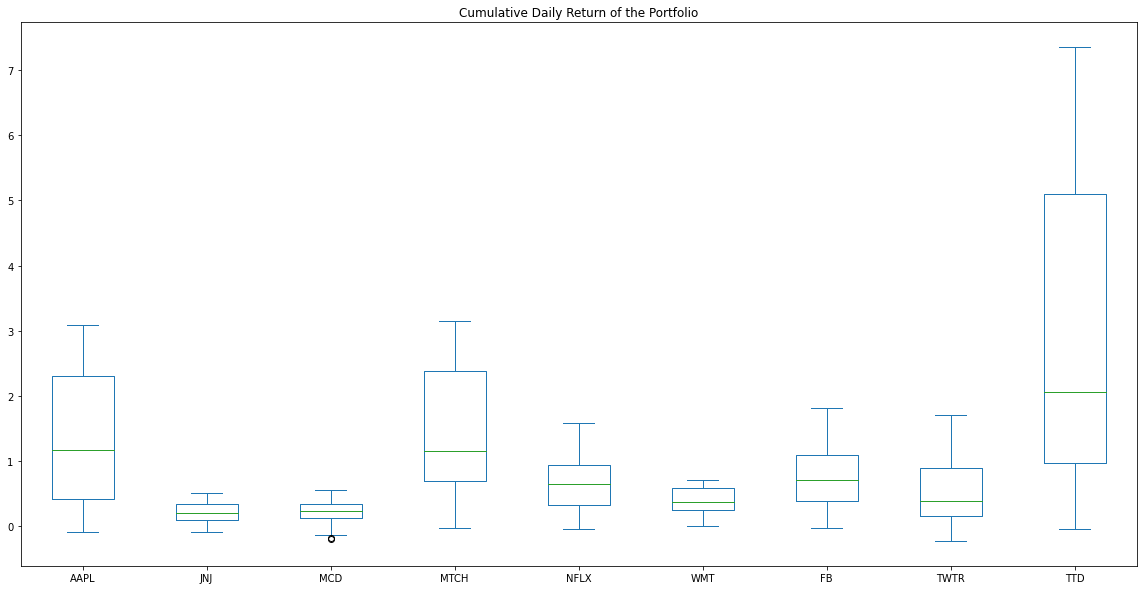

In [31]:
cum_daily_returns_df.plot(figsize=(20,10),kind='box' ,title="Cumulative Daily Return of the Portfolio")

# Standard Deviation

In [32]:
df_daily_returns_dev= df_daily_returns.std()
df_daily_returns_dev.sort_values(ascending=True)
df_daily_returns_dev

AAPL    0.021664
JNJ     0.013726
MCD     0.016792
MTCH    0.030509
NFLX    0.024322
WMT     0.014046
FB      0.022361
TWTR    0.031936
TTD     0.044028
dtype: float64

In [33]:
# Calculate and sort the annualized standard deviation (252 trading days) of the portfolio
# Review the annual standard deviations smallest to largest
df_daily_returns_dev_252 = df_daily_returns_dev*np.sqrt(252)
df_daily_returns_dev_252.sort_values(ascending=True)

JNJ     0.217887
WMT     0.222975
MCD     0.266560
AAPL    0.343906
FB      0.354962
NFLX    0.386096
MTCH    0.484312
TWTR    0.506964
TTD     0.698920
dtype: float64

<AxesSubplot:title={'center':'Rolling 21 Day Daily Return of the Portfolio'}, xlabel='Date'>

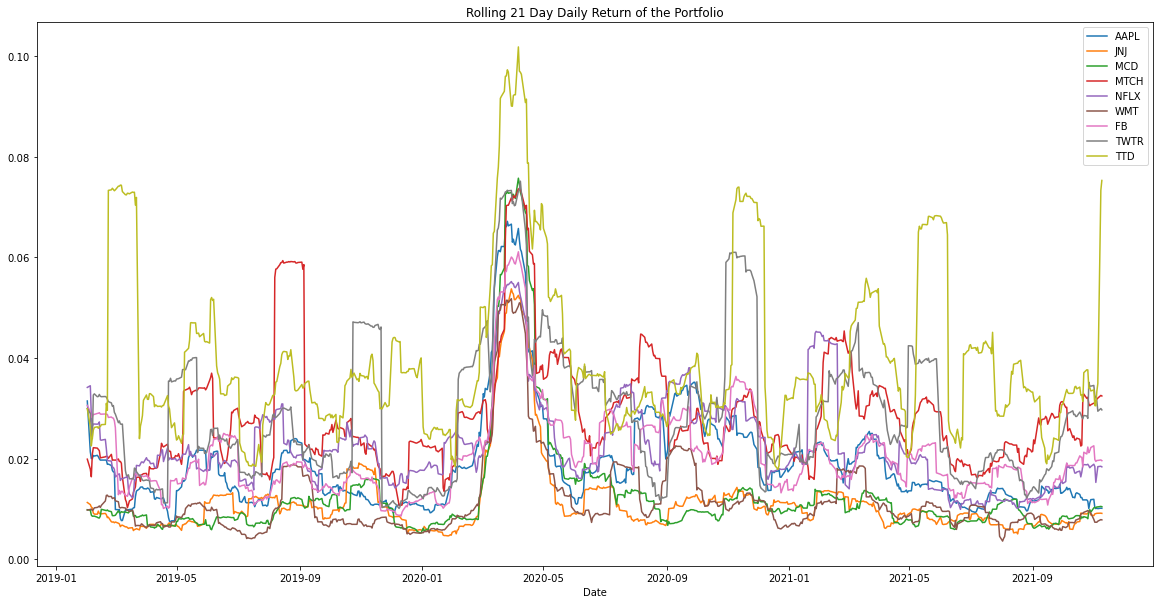

In [34]:
df_daily_returns_std_21=df_daily_returns.rolling(window=21).std()
df_daily_returns_std_21.dropna(inplace=True)
df_daily_returns_std_21.plot(figsize=(20,10),title="Rolling 21 Day Daily Return of the Portfolio")

In [35]:
# Calculate the annualized Returns
df_annual_returns=df_daily_returns.mean()*252
df_annual_returns.sort_values(ascending=True)

JNJ     0.133490
MCD     0.184863
WMT     0.207122
TWTR    0.349264
FB      0.379902
NFLX    0.387984
AAPL    0.539095
MTCH    0.569954
TTD     0.984911
dtype: float64

In [36]:
# Calculate the annualized Sharpe Ratios for each of the portfolio
# Review the Sharpe ratios sorted lowest to highest
df_sharpe=df_annual_returns/df_daily_returns_dev_252
df_sharpe.sort_values(ascending=True)

JNJ     0.612655
TWTR    0.688933
MCD     0.693513
WMT     0.928905
NFLX    1.004889
FB      1.070260
MTCH    1.176834
TTD     1.409191
AAPL    1.567563
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios for the portfolio'}>

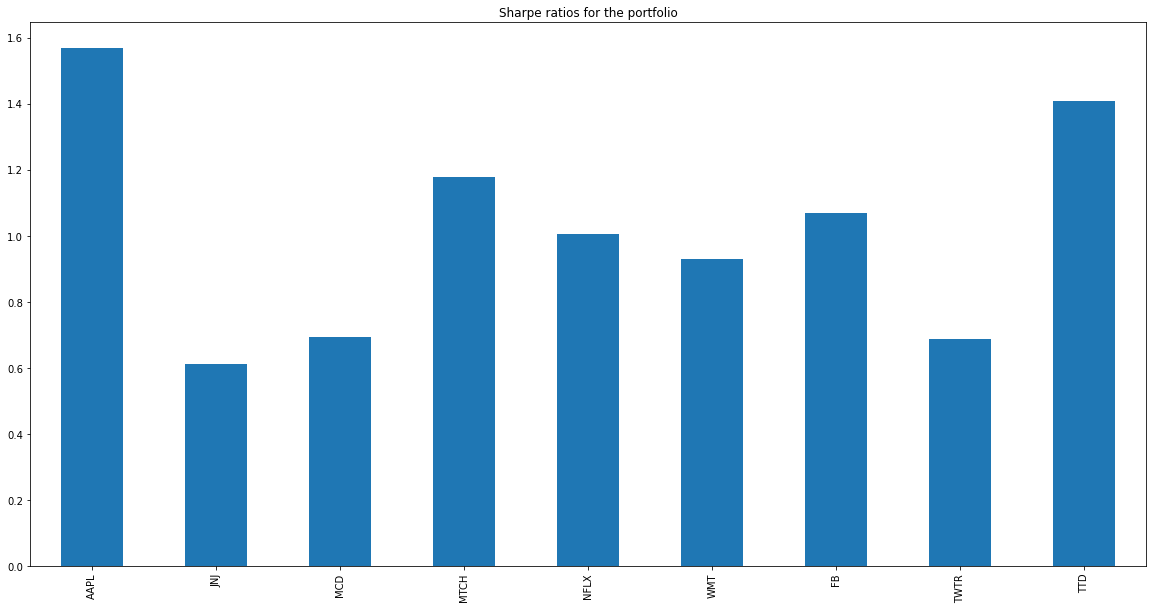

In [37]:
# Visualize the Sharpe ratios as a bar chart
df_sharpe.plot(kind='bar', figsize=(20,10), title='Sharpe ratios for the portfolio')

In [38]:
# Calculate the variance of the SPY using a rolling 60-day window.
df_spy_daily_returns = df_closing_prices['^GSPC'].pct_change()
df_spy_var=df_spy_daily_returns.rolling(window=60).var()
df_spy_var

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2021-11-03    0.000051
2021-11-04    0.000052
2021-11-05    0.000052
2021-11-08    0.000052
2021-11-09    0.000052
Name: ^GSPC, Length: 721, dtype: float64

In [39]:
#Calculate Rolling Covariance 60 day

rolling_covariance_60day = df_daily_returns.rolling(window=60).cov(df_spy_daily_returns)

rolling_covariance_60day.tail()


weight_df = portfolio_df
for ticker in portfolio_tickers:
    weight_df = portfolio_df['Cost Basis']/portfolio_df['Cost Basis'].sum()

rolling_covariance_portfolio_60day = rolling_covariance_60day.dot(weight_df.to_list())

rolling_covariance_portfolio_60day

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2021-11-03    0.000046
2021-11-04    0.000046
2021-11-05    0.000046
2021-11-08    0.000046
2021-11-09    0.000046
Length: 721, dtype: float64

In [40]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
rolling_portfolio_beta=rolling_covariance_portfolio_60day/df_spy_var
rolling_portfolio_beta.tail()

Date
2021-11-03    0.903500
2021-11-04    0.898847
2021-11-05    0.893208
2021-11-08    0.893017
2021-11-09    0.886536
dtype: float64

In [41]:
# Calculate the average of the 60-day rolling beta
avg_rolling_portfolio_beta = rolling_portfolio_beta.mean()
avg_rolling_portfolio_beta

0.9512109975552782

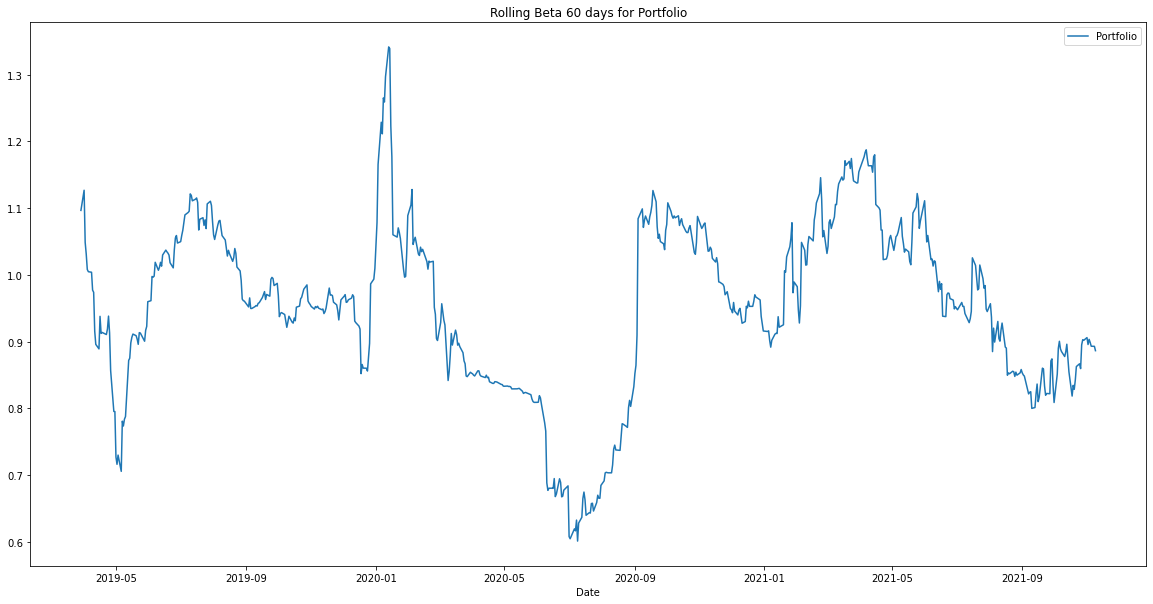

In [42]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
ax = rolling_portfolio_beta.plot(figsize=(20,10), title='Rolling Beta 60 days for Portfolio')
ax.legend(["Portfolio"])

In [43]:
df_ticker.head()

Adj Close                                                 \
                 AAPL          FB         JNJ         MCD       MTCH   
Date                                                                   
2019-01-02  38.326294  135.679993  118.758545  164.881195  42.380001   
2019-01-03  34.508713  131.740005  116.871429  163.794846  41.119999   
2019-01-04  35.981861  137.949997  118.832916  166.960266  43.049999   
2019-01-07  35.901772  138.050003  118.070641  168.777069  43.369999   
2019-01-08  36.586174  142.529999  120.813011  169.132980  44.779999   

                                                                   ...  \
                  NFLX     TTD       TWTR        WMT        ^GSPC  ...   
Date                                                               ...   
2019-01-02  267.660004  11.616  28.809999  88.933060  2510.030029  ...   
2019-01-03  271.200012  10.956  27.990000  88.475708  2447.889893  ...   
2019-01-04  297.570007  11.792  29.950001  89.028328  2531.939941  ...   
2019-01-07  315.339996  12.457  31.340000  90.076401  2549.689941  ...   
2019-01-08  320.269989  12.805  31.799999  90.705231  2574.409912  ...   

               Volume                                                 \
                 AAPL        FB      JNJ      MCD     MTCH      NFLX   
Date                                                                   
2019-01-02  148158800  28146200  7631700  2571500  1677800  11679500   
2019-01-03  365248800  22717900  8654500  3728200  1828000  14969600   
2019-01-04  234428400  29002100  8831700  3194300  2460100  19330100   
2019-01-07  219111200  20089300  8404700  3283000  1471900  18620100   
2019-01-08  164101200  26263800  9351600  2941400  2470500  15359200   

                                                     
                 TTD      TWTR      WMT       ^GSPC  
Date                                                 
2019-01-02   8393000  15053700  8152700  3733160000  
2019-01-03   7754000  19051700  8277300  3822860000  
2019-01-04  11460000  23412600  8029100  4213410000  
2019-01-07  10790000  19917800  7789700  4104710000  
2019-01-08   9501000  18915200  7200900  4083030000  

[5 rows x 60 columns]

In [44]:
df_portfolio_ticker = df_ticker
df_portfolio_ticker.columns = df_portfolio_ticker.columns.swaplevel(0, 1)
df_portfolio_ticker.sort_index(axis=1, level=0, inplace=True)
df_portfolio_ticker = df_portfolio_ticker.drop(columns='^GSPC')
df_portfolio_ticker = df_portfolio_ticker.rename(columns={'Adj Close':'close'})


In [45]:
weight_df.sum()

1.0

In [46]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Portfolio = MCSimulation(
    portfolio_data = df_portfolio_ticker,
    #weights=[0.20, 0.20, 0.40, 0.20],
    weights=weight_df.to_list(),
    num_simulation = num_sims,
    num_trading_days = 252*3
)

In [47]:
MC_Portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/sumeetvaidya/bootcamp-project-1/MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011437,1.020516,1.014972,1.013653,0.998207,1.016497,0.967689,1.000574,0.987059,1.015292,...,1.006267,1.008279,1.012906,1.032630,1.000516,0.990547,1.016891,1.007344,0.983118,0.994268
2,1.021408,1.022922,1.016211,1.025121,1.003552,1.000953,0.972261,1.003527,0.985803,1.003361,...,1.017738,1.018977,1.011057,1.040239,1.003080,0.993698,1.026217,1.002634,0.968282,1.012093
3,1.016194,1.029487,1.025059,1.032432,1.015305,1.016917,0.955104,1.001141,0.982916,1.002274,...,1.024519,1.033021,1.004725,1.028401,0.987266,0.997730,1.034545,0.999572,0.978898,1.004445
4,1.019697,1.056786,1.031679,1.050509,1.009554,1.017658,0.975103,0.995474,1.003460,1.028715,...,1.029707,1.057012,0.996640,1.035459,0.968986,1.007194,1.037953,1.009948,0.999068,0.999984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,6.569725,2.036363,3.277914,5.322732,3.003779,7.507698,4.839301,2.413901,7.447902,6.262127,...,4.291556,3.653987,4.493676,5.341800,3.734866,3.650342,6.945150,3.032515,8.148872,4.380826
753,6.616888,2.087531,3.302308,5.321327,2.989873,7.456924,4.879846,2.432844,7.434772,6.217841,...,4.312657,3.625023,4.564094,5.260551,3.770236,3.688128,7.075932,3.101581,8.241005,4.387328
754,6.546838,2.107634,3.304503,5.300360,3.004091,7.413770,4.989060,2.460860,7.382466,6.155615,...,4.257487,3.648218,4.601204,5.236273,3.719958,3.653475,7.123268,3.171599,8.409630,4.396521
755,6.369849,2.130581,3.316387,5.340100,3.041551,7.620061,4.978113,2.450993,7.244942,6.280565,...,4.258967,3.710515,4.631105,5.097355,3.741827,3.572091,7.141631,3.203011,8.273172,4.415753


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

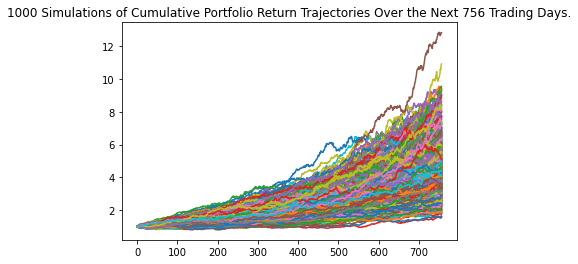

In [48]:
MC_Portfolio.plot_simulation()

In [49]:
simulated_returns_data = {
    "mean": list(MC_Portfolio.simulated_return.mean(axis=1)),
    "median": list(MC_Portfolio.simulated_return.median(axis=1)),
    "min": list(MC_Portfolio.simulated_return.min(axis=1)),
    "max": list(MC_Portfolio.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002155,1.002029,0.967689,1.039035
2,1.003635,1.003801,0.950712,1.055605
3,1.005347,1.004964,0.951542,1.069759
4,1.007292,1.007299,0.941147,1.083121


In [50]:
df_simulated_data=MC_Portfolio.simulated_return
df_simulated_data.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011437,1.020516,1.014972,1.013653,0.998207,1.016497,0.967689,1.000574,0.987059,1.015292,...,1.006267,1.008279,1.012906,1.032630,1.000516,0.990547,1.016891,1.007344,0.983118,0.994268
2,1.021408,1.022922,1.016211,1.025121,1.003552,1.000953,0.972261,1.003527,0.985803,1.003361,...,1.017738,1.018977,1.011057,1.040239,1.003080,0.993698,1.026217,1.002634,0.968282,1.012093
3,1.016194,1.029487,1.025059,1.032432,1.015305,1.016917,0.955104,1.001141,0.982916,1.002274,...,1.024519,1.033021,1.004725,1.028401,0.987266,0.997730,1.034545,0.999572,0.978898,1.004445
4,1.019697,1.056786,1.031679,1.050509,1.009554,1.017658,0.975103,0.995474,1.003460,1.028715,...,1.029707,1.057012,0.996640,1.035459,0.968986,1.007194,1.037953,1.009948,0.999068,0.999984


In [51]:
# Set initial investment
initial_investment = merged_portfolio_sp_YTD['Current Value'].sum()

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,257896.994877,257896.994877,257896.994877,257896.994877
1,258452.785625,258420.350039,249564.055450,267964.036091
2,258834.342176,258877.355936,245185.639592,272237.440620
3,259275.916429,259177.143960,245399.862928,275887.639796
4,259777.467013,259779.370045,242719.053860,279333.586732


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of the Portfolio Over the Next 3 Years'}>

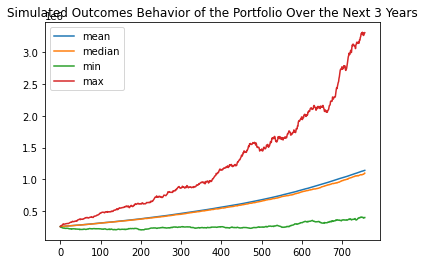

In [52]:
cumulative_pnl.plot(title="Simulated Outcomes Behavior of the Portfolio Over the Next 3 Years")

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_Portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               4.427388
std                1.435127
min                1.552178
25%                3.405650
50%                4.257895
75%                5.172478
max               12.820493
95% CI Lower       2.213521
95% CI Upper       7.749046
Name: 756, dtype: float64


In [54]:
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
print(f"There is a 95% chance that a current investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}.")

There is a 95% chance that a current investment of $257,896.99 in the portfolio over the next year will end within in the range of $570,860.40 and $1,998,455.67.


In [55]:
merged_portfolio_sp_YTD

,Acquisition Date,Quantity,Unit Cost,Cost Basis,Start of Year,Last Close,Ticker Return,SPY Closes,Equiv SPY Shares,SPY Latest Close,...,SPY Gain / (Loss),YTD Close,SPY YTD Close,Share YTD,SPY YTD,Cum Invst,Cum Ticker Returns,Cum SP Returns,Cum Ticker ROI Mult,Current Value
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,2019-02-07,300,43.50,13050.00,2020-12-31,150.809998,2.466896,2706.050049,4.822527,4685.25,...,9544.745624,131.876999,3756.070068,0.143566,0.247381,13050.00,45242.999268,22594.745624,3.466896,45242.999268
JNJ,2019-02-07,100,132.50,13250.00,2020-12-31,162.509995,0.226491,2706.050049,4.896436,4685.25,...,9691.025251,154.516754,3756.070068,0.051731,0.247381,26300.00,61493.998718,45535.770875,2.338175,16250.999451
MCD,2019-02-07,100,175.20,17520.00,2020-12-31,252.649994,0.442066,2706.050049,6.474381,4685.25,...,12814.095275,210.939957,3756.070068,0.197734,0.247381,43820.00,86758.998108,75869.866150,1.979895,25264.999390
MTCH,2019-02-07,200,55.80,11160.00,2020-12-31,155.589996,1.788351,2706.050049,4.124092,4685.25,...,8162.403155,151.190002,3756.070068,0.029102,0.247381,54980.00,117876.997375,95192.269305,2.143998,31117.999268
NFLX,2019-02-07,75,345.40,25905.00,2020-12-31,655.989990,0.899218,2706.050049,9.572994,4685.25,...,18946.868613,540.729980,3756.070068,0.213156,0.247381,80885.00,167076.246643,140044.137918,2.065602,49199.249268
WMT,2019-02-07,125,149.35,18668.75,2020-12-31,149.789993,0.002946,2706.050049,6.898893,4685.25,...,13654.288879,142.464844,3756.070068,0.051417,0.247381,99553.75,185799.995804,172367.176797,1.866328,18723.749161
FB,2019-02-07,150,165.50,24825.00,2020-12-31,335.369995,1.026405,2706.050049,9.173888,4685.25,...,18156.958630,273.160004,3756.070068,0.227742,0.247381,124378.75,236105.495071,215349.135427,1.898278,50305.499268
TWTR,2019-02-07,225,30.31,6819.75,2020-12-31,53.700001,0.771693,2706.050049,2.520186,4685.25,...,4987.952412,54.150002,3756.070068,-0.008310,0.247381,131198.50,248187.995243,227156.837839,1.891698,12082.500172
TTD,2019-02-07,100,14.30,1430.00,2020-12-31,97.089996,5.789510,2706.050049,0.528446,4685.25,...,1045.899329,80.099998,3756.070068,0.212110,0.247381,132628.50,257896.994877,229632.737168,1.944507,9708.999634


In [56]:
merged_portfolio_sp_YTD.reset_index(inplace=True)

In [57]:
merged_portfolio_sp_YTD.dtypes

Ticker                         object
Acquisition Date       datetime64[ns]
Quantity                        int64
Unit Cost                     float64
Cost Basis                    float64
Start of Year          datetime64[ns]
Last Close                    float64
Ticker Return                 float64
SPY Closes                    float64
Equiv SPY Shares              float64
SPY Latest Close              float64
SP Return                     float64
Abs. Return Compare           float64
Ticker Share Value            float64
SPY Value                     float64
Abs Value Compare             float64
Stock Gain / (Loss)           float64
SPY Gain / (Loss)             float64
YTD Close                     float64
SPY YTD Close                 float64
Share YTD                     float64
SPY YTD                       float64
Cum Invst                     float64
Cum Ticker Returns            float64
Cum SP Returns                float64
Cum Ticker ROI Mult           float64
Current Valu

In [58]:
df=merged_portfolio_sp_YTD
#df = df.rename(columns={'Current Value':'Current_Value', 'Stock Gain / (Loss)': 'Stock_Gain_Loss'})
#df['Current_Value'] = df['Current_Value'].map("\$:,.2f".format)
#df['Stock_Gain_Loss'] = df['Stock_Gain_Loss'].map("\$:,.2f".format)
#df['Current_Value']

df = df[['Ticker','Cost Basis','Current Value','Stock Gain / (Loss)']]
#df = df.set_index('Ticker')
df

,Ticker,Cost Basis,Current Value,Stock Gain / (Loss)
0,AAPL,13050.00,45242.999268,32192.999268
1,JNJ,13250.00,16250.999451,3000.999451
2,MCD,17520.00,25264.999390,7744.999390
3,MTCH,11160.00,31117.999268,19957.999268
4,NFLX,25905.00,49199.249268,23294.249268
5,WMT,18668.75,18723.749161,54.999161
6,FB,24825.00,50305.499268,25480.499268
7,TWTR,6819.75,12082.500172,5262.750172
8,TTD,1430.00,9708.999634,8278.999634


In [59]:
fig_current_pnlvalue = px.pie(merged_portfolio_sp_YTD, 
                           values='Stock Gain / (Loss)', names='Ticker', 
                           title='<b>Portfolio Current P&L</b>',height=400, width=800
                          )
fig_current_value = px.pie(merged_portfolio_sp_YTD, 
                           values='Current Value', names='Ticker', 
                           title='<b>Portfolio Current Value</b>',height=400, width=800
                          )

#data_current_value=[go.Table(
#    header=dict(values=['Ticker','Current Value','Stock Gain / (Loss)']
#                ,font_size=14,height=30
#               ),
#    cells=dict(values=[df.Ticker, df.Current_Value, df.Stock_Gain_Loss]
#               ,font_size=12,height=30
#              )
#)]
#layout_table = go.Layout(title = 'Portfolio Current Value'
#    ,height=800, width=800
#    )
#fig_current_value_table = go.Figure(data=data_current_value, layout=layout_table)


# YTD Charts

In [60]:
# Ploty is an outstanding resource for interactive charts.

trace1 = go.Bar(
    x = merged_portfolio_sp_YTD['Ticker'][0:10],
    y = merged_portfolio_sp_YTD['Share YTD'][0:10],
    name = 'Ticker YTD')

trace2 = go.Scatter(
    x = merged_portfolio_sp_YTD['Ticker'][0:10],
    y = merged_portfolio_sp_YTD['SPY YTD'][0:10],
    name = 'SPY YTD')
    
data1 = [trace1, trace2]

layout1 = go.Layout(title = '<b>YTD Return vs SPY YTD</b>'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".2%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.8,y=1)
    ,height=800, width=1600
    )

fig1 = go.Figure(data=data1, layout=layout1)

# Total Return Comparison Charts

In [61]:
trace3 = go.Bar(
    x = merged_portfolio_sp_YTD['Ticker'][0:10],
    y = merged_portfolio_sp_YTD['Ticker Return'][0:10],
    name = 'Ticker Total Return')

trace4 = go.Scatter(
    x = merged_portfolio_sp_YTD['Ticker'][0:10],
    y = merged_portfolio_sp_YTD['SP Return'][0:10],
    name = 'SP500 Total Return')
    
data2 = [trace3, trace4]

layout2 = go.Layout(title = '<b>Total Return vs S&P 500</b>'
    , barmode = 'group'
    , yaxis=dict(title='Returns', tickformat=".2%")
    , xaxis=dict(title='Ticker', tickformat=".2%")
    , legend=dict(x=.8,y=1)
    ,height=800, width=1600
    )

fig2 = go.Figure(data=data2, layout=layout2)

# 

In [62]:
trace5 = go.Bar(
    x = merged_portfolio_sp_YTD['Ticker'][0:10],
    y = merged_portfolio_sp_YTD['Stock Gain / (Loss)'][0:10],
    name = 'Ticker Total Return ($)')

trace6 = go.Bar(
    x = merged_portfolio_sp_YTD['Ticker'][0:10],
    y = merged_portfolio_sp_YTD['SPY Gain / (Loss)'][0:10],
    name = 'SPY Total Return ($)')

trace7 = go.Scatter(
    x = merged_portfolio_sp_YTD['Ticker'][0:10],
    y = merged_portfolio_sp_YTD['Ticker Return'][0:10],
    name = 'Ticker Total Return %',
    yaxis='y2')

data3 = [trace5, trace6, trace7]

layout3 = go.Layout(title = '<b>Gain / (Loss) Total Return vs SPY</b>'
    , barmode = 'group'
    , yaxis=dict(title='Gain / (Loss) ($)')
    , yaxis2=dict(title='Ticker Return', overlaying='y', side='right', tickformat=".2%")
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.75,y=1)
    ,height=800, width=1600
    )

fig3 = go.Figure(data=data3, layout=layout3)

In [63]:
trace8 = go.Bar(
    x = merged_portfolio_sp_YTD['Ticker'],
    y = merged_portfolio_sp_YTD['Cum Invst'],
    # mode = 'lines+markers',
    name = 'Cum Invst')

trace9 = go.Bar(
    x = merged_portfolio_sp_YTD['Ticker'],
    y = merged_portfolio_sp_YTD['Cum SP Returns'],
    # mode = 'lines+markers',
    name = 'Cum SP500 Returns')

trace10 = go.Bar(
    x = merged_portfolio_sp_YTD['Ticker'],
    y = merged_portfolio_sp_YTD['Cum Ticker Returns'],
    # mode = 'lines+markers',
    name = 'Cum Ticker Returns')

trace11 = go.Scatter(
    x = merged_portfolio_sp_YTD['Ticker'],
    y = merged_portfolio_sp_YTD['Cum Ticker ROI Mult'],
    # mode = 'lines+markers',
    name = 'Cum ROI Mult'
    , yaxis='y2')


data4 = [trace8, trace9, trace10, trace11]

layout4 = go.Layout(title = '<b>Total Cumulative Investments Over Time</b>'
    , barmode = 'group'
    , yaxis=dict(title='Returns')
    , xaxis=dict(title='Ticker')
    , legend=dict(x=.4,y=1)
    , yaxis2=dict(title='Cum ROI Mult', overlaying='y', side='right')  
    ,height=800, width=1600
    )

fig4 = go.Figure(data=data4, layout=layout4)

In [64]:
fig5 = px.line(df_daily_returns, title='<b>Daily Returns</b>',
                      labels={"value": "Daily Returns"}
                      #,template='simple_white'
                      ,height=800, width=1600
                     )

In [65]:
fig6 = px.box(cum_daily_returns_df, title = '<b>Cumulative  Returns</b>'
              ,height=800, width=1600
        )

In [66]:
fig7 = px.line(df_daily_returns_std_21,title='<b>Rolling 21 Day Returns</b>',
                      labels={"value": "Daily Returns"}
                      #,template='simple_white'
                      ,height=800, width=1600
                     )

In [67]:
fig8= px.bar(df_sharpe,title='<b>Sharpe Ratio</b>',
                      labels={"value": "Sharpe Ratio"}
                      #,template='simple_white'
                      ,height=800, width=1600
                     )

In [68]:
fig9 = px.line(rolling_portfolio_beta,title='<b>Rolling 60 Day Beta</b>',
                      labels={"value": "Beta"}
                      #,template='simple_white'
                      ,height=800, width=1600
                     )

In [69]:
fig_simulated_returns = px.line(df_simulated_data, 
                          title='<b>Simulated Returns</b>',
                          labels={"value": "Returns"}
                          ,height=800, width=1600
                         )

/opt/anaconda3/envs/project/lib/python3.7/site-packages/plotly/express/_core.py:1198: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [70]:
fig_simulated_cum_pnl = px.line(cumulative_pnl, 
                          title='<b>Simulated Cumulative P&L<b>',
                          labels={"value": "Returns"}
                          ,height=800, width=1600
                         )

In [71]:
df

,Ticker,Cost Basis,Current Value,Stock Gain / (Loss)
0,AAPL,13050.00,45242.999268,32192.999268
1,JNJ,13250.00,16250.999451,3000.999451
2,MCD,17520.00,25264.999390,7744.999390
3,MTCH,11160.00,31117.999268,19957.999268
4,NFLX,25905.00,49199.249268,23294.249268
5,WMT,18668.75,18723.749161,54.999161
6,FB,24825.00,50305.499268,25480.499268
7,TWTR,6819.75,12082.500172,5262.750172
8,TTD,1430.00,9708.999634,8278.999634


In [72]:
#tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
#children = [widgets.Text(description=name) for name in tab_contents]
#tab = widgets.Tab()
#tab.children = children
#tab.titles = [str(i) for i in range(len(children))]
#tab

In [73]:
app = dash.Dash()

app.layout = html.Div( children=[
    html.Div([
        html.H1(children='Portfolio Analysis Dashboard',style={
                'textAlign': 'center','align': 'center'})
    ])
    ,html.Hr()
    ,html.Div(
            dash_table.DataTable(
                id="Portfolio Summary Table",
                columns=[
                    {"name": "Ticker", "id": "Ticker"},
                    {
                        "name": "Cost Basis",
                        "id": "Cost Basis",
                        "type": "numeric",
                        "format": Format()  # formatted using the Format() object
                        .scheme(Scheme.fixed)
                        .precision(2)
                        .symbol_prefix("$")
                        .symbol(Symbol.yes)
                        .group(Group.yes),
                    },
                   {
                        "name": "Current Value",
                        "id": "Current Value",
                        "type": "numeric",
                        # formatted using FormatTemplate:
                        "format": FormatTemplate.money(2),
                    },
                    {
                        "name": "Stock Gain / (Loss)",
                        "id": "Stock Gain / (Loss)",
                        "type": "numeric",
                        # formatted using FormatTemplate:
                        "format": FormatTemplate.money(2),
                    },
                ]
                ,data=df.to_dict("records")
                ,fixed_rows={'headers': True}
                ,style_table={'maxHeight': '50ex','overflowY': 'scroll','width': '100%','minWidth': '100%',} 
                ,style_cell={'minWidth': 80, 'maxWidth': 250, 'width': 250,
                             'font_family': 'sans-serif','font_size': '20px','text_align': 'center'}
                ,style_data={'whiteSpace': 'normal','height': 'auto'}
                ,fill_width=False
                
            )
        )
     
    ,html.Div([
        html.Div([ 
                    dcc.Graph(id="Portfolio Summary", figure=fig_current_value)], 
                style={'width': '48%', 'display': 'inline-block'})

        ,html.Div([
                    dcc.Graph(id="Portfolio PNL Summary", figure=fig_current_pnlvalue)],
                style={'width': '48%', 'align': 'right', 'display': 'inline-block'})
    ])
    #,dcc.Graph(id="Portfolio Summary", figure=fig_current_value)
    #,dcc.Graph(id="Portfolio PNL Summary", figure=fig_current_pnlvalue)
   

    ,html.Div([ dcc.Graph(id="Daily Returns", figure=fig5)])
    
    
    ,html.Div([dcc.Graph(id="Cumulative Returns", figure=fig6)])
    
   
    ,html.Div([dcc.Graph(id="Rolling 21 Day Returns", figure=fig7)])
    ,dcc.Graph(id="Sharpe Ratio", figure=fig8)
    

    ,html.Div([dcc.Graph(id="Rolling 60 Day Beta", figure=fig9)])
    ,html.Div([dcc.Graph(id="Simulated Returns", figure=fig_simulated_returns)])
    
    ,html.Div([dcc.Graph(id="Simulated Cumulative P&L", figure=fig_simulated_cum_pnl)])
    ,html.H3(children=
        f"Summary: "
        f"There is a 95% chance that a current investment of ${initial_investment:,.2f} in the portfolio"
        f" over the next three years will end within in the range of"
        f" ${ci_lower:,.2f} and ${ci_upper:,.2f}."
    )
    
    ,html.Div([dcc.Graph(id="YTD Summary", figure=fig1)])
    ,html.Div([dcc.Graph(id="Total Return", figure=fig2)])
    

    ,html.Div([dcc.Graph(id="Total Cumulative Return", figure=fig3)])
    ,html.Div([dcc.Graph(id="Total Cumulative ROI", figure=fig4)])
    
    #,dcc.Graph(id="YOY Summary", figure=fig_year_summary)
    ##,dcc.Graph(id="Daily Volume", figure=fig_vol)
    #,dcc.Graph(id="Daily Returns", figure=fig_returns)
    #,dcc.Graph(id="Cumulative Daily Returns", figure=fig_cum_returns)
    #,dcc.Graph(id="Cumulative BTC Daily Returns", figure=fig_cum_btc_returns)
    #,dcc.Graph(id="Rolling 21 Day Daily Returns", figure=fig_daily_returns_std_21)
    #,dcc.Graph(id="Sharpe Ratio", figure=fig_sharpe_ratio)
    
    ##,dcc.Graph(id="Daily Returns and Volume", figure=fig)
])

app.css.append_css({
    'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
})



#rendered = render_template('pdf_template.html')
#pdf = pdfkit.from_string(rendered, False)
#response = make_response(pdf)
#response.headers['Content-Type'] = 'application/pdf'
#response.headers['Content-Disposition'] = 'attachment; filename=output.pdf'


if __name__ == "__main__":
    #app.run_server(debug=True)
    app.run_server( port = 8096, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)




Dash is running on http://127.0.0.1:8096/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8096/ (Press CTRL+C to quit)
/opt/anaconda3/envs/project/lib/python3.7/site-packages/dash/resources.py:72: UserWarning:

You have set your config to `serve_locally=True` but A local version of https://codepen.io/chriddyp/pen/bWLwgP.css is not available.
If you added this file with `app.scripts.append_script` or `app.css.append_css`, use `external_scripts` or `external_stylesheets` instead.
See https://dash.plot.com/external-resources

127.0.0.1 - - [09/Nov/2021 23:27:49] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2021 23:27:49] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2021 23:27:50] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2021 23:27:50] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2021 23:27:51] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2021 23:27:53] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Nov/2021 23:27:54] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - 